data url = https://www.kaggle.com/datasets/urmilsojitra/hotel-booking-cancellation

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv(r'/Users/afni/Desktop/Portfolio projects/HotelBookingCancellation/Hotel_Bookings.csv')

In [3]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
data['arrival_date_year'].unique()

array([2015, 2016, 2017])

## Data Cleaning

In [5]:
data.shape

(119390, 32)

In [6]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
data.drop(['agent', 'company'], axis=1,inplace=True)

In [8]:
data['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [9]:
data['country'].fillna(data['country'].value_counts().index[0], inplace=True)

In [10]:
data.fillna(0, inplace=True)

In [11]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

The data seems have dirtiness in columns of adults, babies & children.
These three entities can't be zero because this may cause impossibility for booking.

In [12]:
filter = (data['children']==0) & (data['babies']==0) & (data['adults']==0)

In [13]:
data[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,06/10/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,12/10/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,23/11/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,04/01/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,05/01/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,30/06/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,01/07/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,17/07/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,22/07/2017


In [14]:
df = data[~filter]

In [15]:
df.shape

(119210, 30)

In [16]:
data.shape

(119390, 30)

In [17]:
data[data['children']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,06/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,07/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,07/09/2017


## Spatial Analysis -> To know where the guests come from.

Spatial analysis refers to studying entities by examining, assessing, evaluating, and modeling spatial data features such as locations, attributes, and relationships that reveal data’s geometric or geographic properties. It uses a variety of computational models, analytical techniques, and algorithmic approaches to assimilate geographic information and define its suitability for a target system.

** Importance of spatial analysis:

- Spatial analysis is more than only the mapping of physical objects. As spatial information is collected from multiple sources, decision-makers can use the consolidated version of this spatial data to take action based on the need. For example, spatial analysis can aid in traffic management in an urban setting, thereby allowing authorities to take steps toward building resilient cities.

In [18]:
df['is_canceled'].unique()

array([0, 1])

In [19]:
len(df[df['is_canceled']==0])

75011

In [20]:
df[df['is_canceled']==0]['country'].value_counts()/75011

PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

In [21]:
country_data = df[df['is_canceled']==0]['country'].value_counts().reset_index()
country_data.columns=['country', 'no_of_guests']
country_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [22]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs ,init_notebook_mode ,plot ,iplot
init_notebook_mode(connected=True)
import plotly.express as px

In [37]:
map_guest=px.choropleth(country_data,
             locations=country_data['country'],
             color=country_data['no_of_guests'],
              hover_name=country_data['country'],
              title='home country of guests'
             )
map_guest.show()

Conclusion:
- Most guests are from Portugal and other countries in Europe

## Fee of room per night

Both hotels have different room types and different meal arrangements. Seasonal factors are also important to the price, so the prices vary a lot. Since no currency information is given, and Portugal is part of the European Monetary Union, I assume that all prices are in EUR.

In [24]:
df2 = df[df['is_canceled']==0]
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'Price( EUR)')

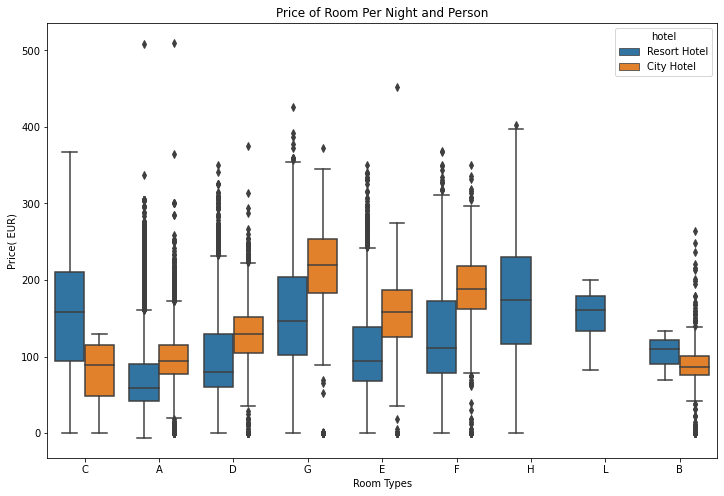

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr' ,hue='hotel',data=df2)

plt.title('Price of Room Per Night and Person')
plt.xlabel('Room Types')
plt.ylabel('Price( EUR)')

This figure shows the average price per room, depending on its type and the standard deviation. Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

## The Most Busy Month

In [26]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [27]:
data_resort=df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0)]
data_city = df[(df['hotel']=='City Hotel') & (df['is_canceled']==0)]

In [28]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [29]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no_of_guests']
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [30]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no_of_guests']
rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [31]:
final_rush=rush_resort.merge(rush_city,on='month')
final_rush.columns=['month','no_of_guests_in_resort','no_of_guests_city']
final_rush

,month,no_of_guests_in_resort,no_of_guests_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [32]:
!pip install sorted-months-weekdays

## Dependency package needs to be installed
!pip install sort_dataframeby_monthorweek


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [33]:
import sort_dataframeby_monthorweek as sd
final_rush=sd.Sort_Dataframeby_Month(final_rush,'month')
final_rush.columns

Index(['month', 'no_of_guests_in_resort', 'no_of_guests_city'], dtype='object')

In [41]:
px.line(data_frame=final_rush,x='month',y=['no_of_guests_in_resort', 'no_of_guests_city'])

This figure clearly shows that the prices in the Resort hotel are much higher during the summer. And the price of the city hotel varies less and is most expensive during spring and autumn.

## Month with the highest pay

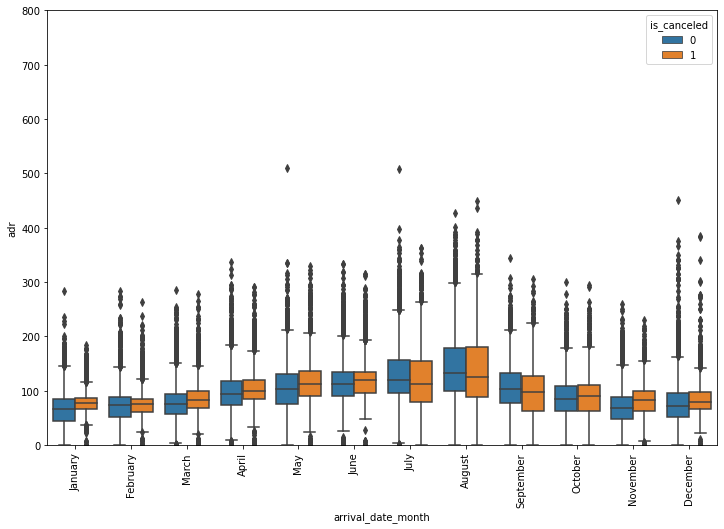

In [43]:
df=sd.Sort_Dataframeby_Month(df,'arrival_date_month')
plt.figure(figsize=(12,8))
sns.boxplot(x='arrival_date_month',y='adr',data=df ,hue='is_canceled')
plt.xticks(rotation='vertical')


plt.ylim(0,800)
plt.show()

## Analyze whether bookings were made only for weekdays or for weekends or for both

In [44]:
### Lets create a relationship table
pd.crosstab(index=df['stays_in_weekend_nights'],columns=df['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
## Function

def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    
    if row[feature2]==0 and row[feature1] >0 :
        return 'stay_just_weekend'
    
    elif row[feature2]>0 and row[feature1] ==0 :
        return 'stay_just_weekdays'
    
    elif row[feature2]>0 and row[feature1] >0 :
        return 'stay_both_weekdays_weekends'
    
    else:
        return 'undefined_data'

In [46]:
df2['weekend_or_weekday']=df2.apply(week_function,axis=1)

In [47]:
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,01/07/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,01/07/2015,undefined_data
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,02/07/2015,stay_just_weekdays
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,02/07/2015,stay_just_weekdays
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,03/07/2015,stay_just_weekdays


In [48]:
df2['weekend_or_weekday'].value_counts()

stay_both_weekdays_weekends    37551
stay_just_weekdays             31788
stay_just_weekend               5050
undefined_data                   622
Name: weekend_or_weekday, dtype: int64

In [49]:
df2=sd.Sort_Dataframeby_Month(df2,'arrival_date_month')
df2.groupby(['arrival_date_month','weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday         
April               stay_both_weekdays_weekends    3627
                    stay_just_weekdays             2559
                    stay_just_weekend               344
                    undefined_data                   30
August              stay_both_weekdays_weekends    4929
                    stay_just_weekdays             3137
                    stay_just_weekend               509
                    undefined_data                   49
December            stay_both_weekdays_weekends    1901
                    stay_just_weekdays             2123
                    stay_just_weekend               298
                    undefined_data                   69
February            stay_both_weekdays_weekends    2438
                    stay_just_weekdays             2514
                    stay_just_weekend               360
                    undefined_data                   47
January             stay_both_weekdays_weekends    1550


In [50]:
group_data=df2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()
sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')
sorted_data.set_index('arrival_date_month',inplace=True)
sorted_data

,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<AxesSubplot:xlabel='arrival_date_month'>

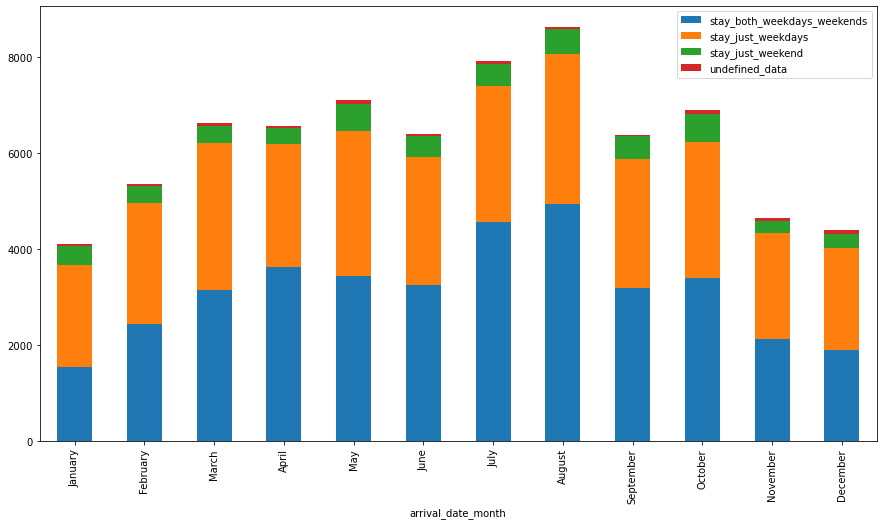

In [53]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,8))

We cam see from the graph that people mostly have a holiday and stay at the hotel during weekdays.

## Create more features

In [54]:
def family(row):
    if (row['adults']>0) &  (row['children']>0 or row['babies']>0) :
        return 1
    else:
        return 0

In [55]:
df['is_family']=df.apply(family,axis=1)

In [56]:
df['total_customer'] = df['adults'] + df['babies'] + df['children']

In [57]:
df['total_nights']=df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [58]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,59.94,0,1,Check-Out,02/01/2016,0,2.0,1
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,116.10,1,1,Check-Out,02/01/2016,1,4.0,1
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,Transient,89.00,0,1,No-Show,01/01/2016,0,2.0,1
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,0,Transient,73.46,0,2,Check-Out,03/01/2016,0,2.0,2
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,0,Transient,119.00,0,0,Canceled,22/12/2015,1,4.0,2


In [59]:
df['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [60]:
dict1={'No Deposit':0, 'Non Refund':1, 'Refundable': 0}
df['deposit_given']=df['deposit_type'].map(dict1)

In [61]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [62]:
df.drop(columns=['adults', 'children', 'babies', 'deposit_type'],axis=1,inplace=True)
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

## Feature Encoding
Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. And This process is called feature encoding.

Data frame analytics automatically performs feature encoding. The input data is pre-processed with the following encoding techniques:
- One-hot encoding: Assigns vectors to each category. 
  The vector represent whether the corresponding feature is present (1) or not (0).
- Target-mean encoding: Replaces categorical values with the mean value of the target variable.
- Frequency encoding: Takes into account how many times a given categorical value is present in relation with a feature.

When the model makes predictions on new data, the data needs to be processed in the same way it was trained. Machine learning model inference in the Elastic Stack does this automatically, so the automatically applied encodings are used in each call for inference.

In [64]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [65]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [66]:
cate_features=[col for col in df.columns if df[col].dtype=='object']
num_features=[col for col in df.columns if df[col].dtype!='object']

In [69]:
categorical=data[cate_features]

In [70]:
df.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [71]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [72]:
categorical['cancellation']=df['is_canceled']

In [73]:
categorical.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,01/07/2015,0.0
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,01/07/2015,0.0
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,Transient,Check-Out,02/07/2015,1.0
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,Transient,Check-Out,02/07/2015,0.0
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,03/07/2015,1.0


In [74]:
cols=categorical.columns
cols=cols[0:-1]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [75]:
# Mean Encoding Technique 

for col in cols:
    dict2=categorical.groupby([col])['cancellation'].mean().to_dict()
    categorical[col]=categorical[col].map(dict2)

In [76]:
categorical.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.362232,0.332043,0.376748,0.369035,0.359835,0.365396,0.247046,0.335299,0.363368,0.377924,0.333333,0.0
1,0.362232,0.332043,0.376748,0.369035,0.359835,0.365396,0.247046,0.335299,0.363368,0.377924,0.333333,0.0
2,0.362232,0.332043,0.376748,0.378448,0.359835,0.365396,0.377729,0.335299,0.363368,0.377924,0.296375,1.0
3,0.362232,0.332043,0.376748,0.378448,0.457499,0.482475,0.377729,0.373665,0.363368,0.377924,0.296375,0.0
4,0.362232,0.332043,0.376748,0.378448,0.361102,0.363901,0.377729,0.373665,0.363368,0.377924,0.137255,1.0


## Handle Outliers
### Why we should handle outliers?
In the machine learning pipeline, data cleaning and preprocessing is an important step as it helps you better understand the data. During this step, you deal with missing values, detect outliers, and more.

As outliers are very different values—abnormally low or abnormally high—their presence can often skew the results of statistical analyses on the dataset. This could lead to less effective and less useful models.

But dealing with outliers often requires domain expertise, and none of the outlier detection techniques should be applied without understanding the data distribution and the use case.

In [77]:
df[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,173,2016,53,26,3,8,0,0,0,4,0,117.82,0,1,1,3.0,11,0
119206,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0
119207,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0
119208,0,310,2016,53,27,2,10,0,0,0,2,0,68.57,0,2,0,2.0,12,0


In [78]:
dataframe=pd.concat([categorical,df[num_features]],axis=1)
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [79]:
dataframe.drop(['cancellation'],axis=1,inplace=True)
dataframe.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.362232,0.332043,0.376748,0.369035,0.359835,0.365396,0.247046,0.335299,0.363368,0.377924,...,0.0,0.0,0.0,59.94,0.0,1.0,0.0,2.0,1.0,0.0
1,0.362232,0.332043,0.376748,0.369035,0.359835,0.365396,0.247046,0.335299,0.363368,0.377924,...,0.0,0.0,0.0,116.10,1.0,1.0,1.0,4.0,1.0,0.0
2,0.362232,0.332043,0.376748,0.378448,0.359835,0.365396,0.377729,0.335299,0.363368,0.377924,...,0.0,0.0,0.0,89.00,0.0,1.0,0.0,2.0,1.0,0.0
3,0.362232,0.332043,0.376748,0.378448,0.457499,0.482475,0.377729,0.373665,0.363368,0.377924,...,0.0,0.0,0.0,73.46,0.0,2.0,0.0,2.0,2.0,0.0
4,0.362232,0.332043,0.376748,0.378448,0.361102,0.363901,0.377729,0.373665,0.363368,0.377924,...,0.0,0.0,0.0,119.00,0.0,0.0,1.0,4.0,2.0,0.0


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

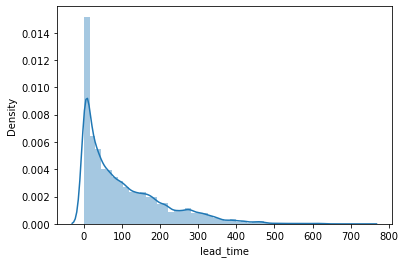

In [80]:
sns.distplot(dataframe['lead_time'])

In [81]:
def handle_outlier(col):
    dataframe[col]=np.log1p(dataframe[col])

### Handle outliers in 'lead_time'

In [82]:
handle_outlier('lead_time')

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

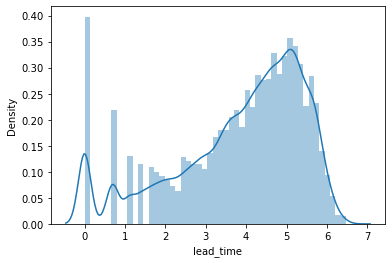

In [83]:
sns.distplot(dataframe['lead_time'])

### Handle outliers in 'adr'

<AxesSubplot:xlabel='adr', ylabel='Density'>

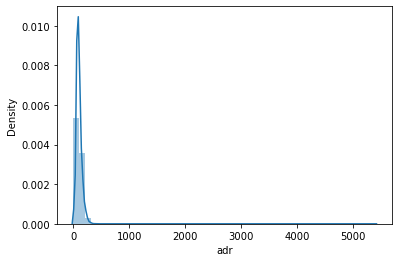

In [84]:
sns.distplot(dataframe['adr'])

In [85]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
14989,0.362232,0.332043,0.337093,0.369035,0.378723,0.363901,0.377729,0.373665,0.363368,0.354627,...,2.0,2.0,0.0,-6.38,0.0,0.0,0.0,2.0,10.0,0.0


In [86]:
handle_outlier('adr')

In [87]:
dataframe['adr'].isnull().sum()

181

We have negative value in 'adr' feature as '-6.38', and if we apply ln(1+x), we will get 'nan'bcz log wont take negative values..

<AxesSubplot:xlabel='adr', ylabel='Density'>

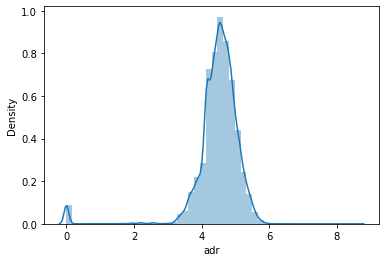

In [88]:
sns.distplot(dataframe['adr'].dropna())

## Select important Features using Co-relation & Univariate Analysis
What is Univariate Analysis & Correlation?
- Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe. It takes data, summarizes that data and finds patterns in the data.
- Correlation, statistical technique which determines how one variables moves/changes in relation with the other variable. It gives us the idea about the degree of the relationship of the two variables.

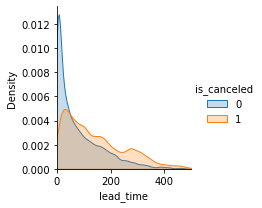

In [89]:
sns.FacetGrid(df,hue='is_canceled',xlim=(0,500)).map(sns.kdeplot,'lead_time',shade=True).add_legend()

In [90]:
corr=dataframe.corr()
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
hotel,1.000000,0.008204,-0.020889,0.059481,-0.015948,-0.080839,0.247523,0.288312,0.035939,-0.071779,...,-0.017556,-0.006089,-0.020456,0.165774,-0.015787,0.057350,0.032091,0.062345,0.031835,-0.000602
arrival_date_month,0.008204,1.000000,0.025833,0.034902,0.053584,0.067641,0.045393,0.017060,0.028986,0.003095,...,-0.015955,-0.034948,0.020704,0.077248,-0.044639,-0.034954,0.017996,0.037399,0.018414,0.094489
meal,-0.020889,0.025833,1.000000,-0.008144,0.090629,0.083824,-0.017085,-0.008663,-0.016212,0.009338,...,0.005089,-0.009734,-0.002222,0.022478,-0.018200,0.000548,0.005113,0.018142,-0.002666,0.012680
country,0.059481,0.034902,-0.008144,1.000000,-0.006273,-0.002000,0.017798,0.022755,0.019698,0.031550,...,-0.002916,-0.012250,0.000486,0.001161,-0.015267,-0.010266,-0.000172,0.003328,0.001022,0.029288
market_segment,-0.015948,0.053584,0.090629,-0.006273,1.000000,0.782403,0.125694,0.030349,0.182416,0.014921,...,-0.009461,-0.000609,-0.005715,0.020112,-0.015122,-0.001439,0.004378,0.013340,0.004488,0.004876
distribution_channel,-0.080839,0.067641,0.083824,-0.002000,0.782403,1.000000,0.052954,-0.009835,0.099068,0.058066,...,-0.006251,-0.002205,-0.000213,-0.004169,-0.018054,-0.011931,-0.004838,-0.000010,0.000402,0.014178
reserved_room_type,0.247523,0.045393,-0.017085,0.017798,0.125694,0.052954,1.000000,0.595708,0.113706,-0.022244,...,-0.004519,-0.010346,-0.015531,0.059668,-0.014615,0.012334,0.009310,0.021830,0.010399,0.012766
assigned_room_type,0.288312,0.017060,-0.008663,0.022755,0.030349,-0.009835,0.595708,1.000000,0.059653,-0.039605,...,-0.004919,-0.008336,-0.004129,0.064875,-0.004952,0.016624,0.010745,0.023495,0.010353,0.008000
customer_type,0.035939,0.028986,-0.016212,0.019698,0.182416,0.099068,0.113706,0.059653,1.000000,0.068430,...,-0.016147,-0.011412,0.009629,0.002035,-0.028154,-0.015441,-0.021896,-0.017506,-0.020507,0.020540
reservation_status,-0.071779,0.003095,0.009338,0.031550,0.014921,0.058066,-0.022244,-0.039605,0.068430,1.000000,...,-0.001728,0.001498,0.036209,-0.077437,-0.013626,-0.033012,-0.045044,-0.045272,-0.024548,0.042559


In [91]:
corr['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
deposit_given                     0.481507
reservation_status_date           0.471130
lead_time                         0.320075
arrival_date_month                0.215027
previous_cancellations            0.110139
adr                               0.081660
country                           0.057959
distribution_channel              0.056986
days_in_waiting_list              0.054301
total_customer                    0.044826
market_segment                    0.042769
reservation_status                0.035775
customer_type                     0.035548
reserved_room_type                0.032633
meal                              0.031140
stays_in_week_nights              0.025542
assigned_room_type                0.020825
total_nights                      0.018554
arrival_date_year                 0.016622
hotel                             0.012570
arrival_date_week_number          0.008315
stays_in_weekend_nights          -0.001323
arrival_dat

In [92]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['is_canceled', 'deposit_given', 'reservation_status_date', 'lead_time',
       'arrival_date_month', 'previous_cancellations', 'adr', 'country',
       'distribution_channel', 'days_in_waiting_list', 'total_customer',
       'market_segment', 'reservation_status', 'customer_type',
       'reserved_room_type', 'meal', 'stays_in_week_nights',
       'assigned_room_type', 'total_nights', 'arrival_date_year', 'hotel',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'is_family',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [93]:
features_to_drop=['reservation_status', 'reservation_status_date','arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month']

In [94]:
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [95]:
dataframe.shape

(119390, 24)

## Finding Important features for model building
Feature importance values indicate which fields had the biggest impact on each prediction that is generated by classification or regression analysis. Each feature importance value has both a magnitude and a direction (positive or negative), which indicate how each field (or feature of a data point) affects a particular prediction.

The purpose of feature importance is to help us determine whether the predictions are sensible. Is the relationship between the dependent variable and the important features supported by our domain knowledge? The lessons we learn about the importance of specific features might also affect our decision to include them in future iterations of our trained model.

In [96]:
dataframe.isnull().sum()

hotel                               0
arrival_date_month                  0
meal                                0
country                             0
market_segment                      0
distribution_channel                0
reserved_room_type                  0
assigned_room_type                  0
customer_type                       0
is_canceled                       180
lead_time                         180
stays_in_week_nights              180
is_repeated_guest                 180
previous_cancellations            180
previous_bookings_not_canceled    180
booking_changes                   180
days_in_waiting_list              180
adr                               181
required_car_parking_spaces       180
total_of_special_requests         180
is_family                         180
total_customer                    180
total_nights                      180
deposit_given                     180
dtype: int64

In [97]:
dataframe.dropna(inplace=True)

In [99]:
len(dataframe)

119209

### Separate dependent & independent features

In [100]:
x=dataframe.drop('is_canceled',axis=1)
y=dataframe['is_canceled']

### Lasso(alpha=0.005)
- Select a suitable alpha (equivalent of penalty).
- The bigger the alpha the less features that will be selected.


In [102]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [103]:
feature_sel_model.get_support()

array([False,  True, False, False, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [104]:
cols=x.columns
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'lead_time', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [105]:
# Print the number of selected features

selected_feature=cols[feature_sel_model.get_support()]
selected_feature

Index(['arrival_date_month', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [106]:
x=x[selected_feature]

In [108]:
x

,arrival_date_month,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customer,total_nights,deposit_given
0,0.332043,4.700480,0.0,0.0,0.0,0.0,4.109890,0.0,1.0,2.0,1.0,0.0
1,0.332043,4.700480,0.0,0.0,0.0,0.0,4.763028,1.0,1.0,4.0,1.0,0.0
2,0.332043,1.098612,0.0,0.0,0.0,0.0,4.499810,0.0,1.0,2.0,1.0,0.0
3,0.332043,4.488636,0.0,0.0,0.0,0.0,4.310262,0.0,2.0,2.0,2.0,0.0
4,0.332043,3.044522,0.0,0.0,0.0,0.0,4.787492,0.0,0.0,4.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0.295174,5.159055,0.0,0.0,4.0,0.0,4.777610,0.0,1.0,3.0,11.0,0.0
119206,0.295174,2.890372,0.0,0.0,0.0,0.0,4.514589,0.0,1.0,2.0,7.0,0.0
119207,0.295174,4.682131,0.0,0.0,0.0,0.0,4.649857,0.0,0.0,2.0,7.0,0.0
119208,0.295174,5.739793,0.0,0.0,2.0,0.0,4.242333,0.0,2.0,2.0,12.0,0.0


# Machine Learning Model Building

In [110]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.25)
X_train.shape

(89406, 12)

### Logistic Regression
This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:

Logit(pi) = 1/(1+ exp(-pi))

ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k

In [112]:
# Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression()

In [113]:
pred=logreg.predict(X_test)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [116]:
confusion_matrix(y_test,pred)

array([[17754,  1024],
       [ 5222,  5803]])

In [117]:
accuracy_score(y_test,pred)

0.7904237828406536

## Cross-Validate model

Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data.

In [118]:
score=cross_val_score(logreg,x,y,cv=10)
score

array([0.76210049, 0.78198138, 0.82828622, 0.68031205, 0.80949585,
       0.73148226, 0.74029024, 0.86066605, 0.86393759, 0.78104027])

In [119]:
score.mean()

0.783959240334439

## Multiple Algorithms

In [120]:
models=[]

models.append(('LogisticRegression',LogisticRegression()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Decision_tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))

In [121]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    
    predictions=model.predict(X_test)
    
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(predictions,y_test)
    print(acc)
    print('\n')

LogisticRegression
[[17754  5222]
 [ 1024  5803]]
0.7904237828406536


Random Forest
[[17487  2661]
 [ 1291  8364]]
0.8673958997416368


Decision_tree
[[16211  2405]
 [ 2567  8620]]
0.8331711572660471


KNN
[[16782  3597]
 [ 1996  7428]]
0.8123343287588498




We can see tha the Random Forest Model has the highest accuracy score